## Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?
Dataset- https://drive.google.com/file/d/1Z9oLpmt6IDRNw7IeNcHYTGeJRYypRSC0/view?



In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data= pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
data=data.drop(['society'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [4]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [5]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [6]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12146 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  object 
 1   availability  12146 non-null  object 
 2   location      12146 non-null  object 
 3   size          12146 non-null  object 
 4   total_sqft    12146 non-null  object 
 5   bath          12146 non-null  float64
 6   balcony       12146 non-null  float64
 7   price         12146 non-null  float64
dtypes: float64(3), object(5)
memory usage: 854.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=LabelEncoder().fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12146 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12146 non-null  int32  
 1   availability  12146 non-null  int32  
 2   location      12146 non-null  int32  
 3   size          12146 non-null  int32  
 4   total_sqft    12146 non-null  int32  
 5   bath          12146 non-null  float64
 6   balcony       12146 non-null  float64
 7   price         12146 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 616.8 KB


In [8]:
c=data.corr()
print(c['price'])

area_type      -0.056610
availability    0.031656
location        0.011827
size            0.385559
total_sqft      0.220550
bath            0.456023
balcony         0.118570
price           1.000000
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Count'>

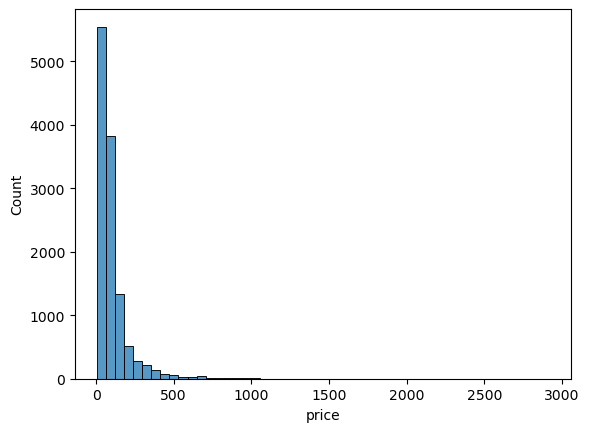

In [9]:
import seaborn as sns
sns.histplot(data,x='price',bins=50)

<Axes: >

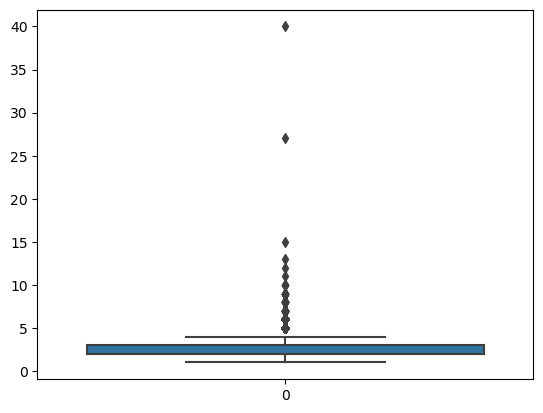

In [10]:
sns.boxplot(data['bath'])

<Axes: >

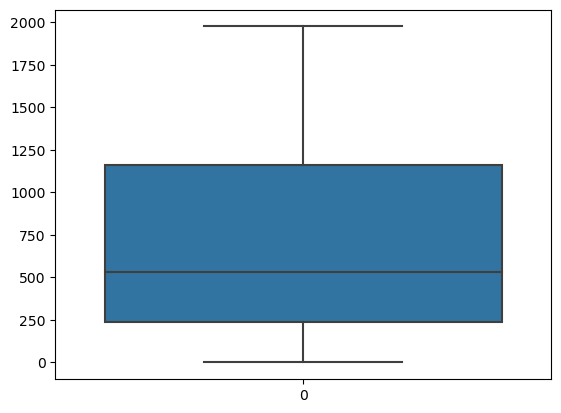

In [11]:
sns.boxplot(data['total_sqft'])

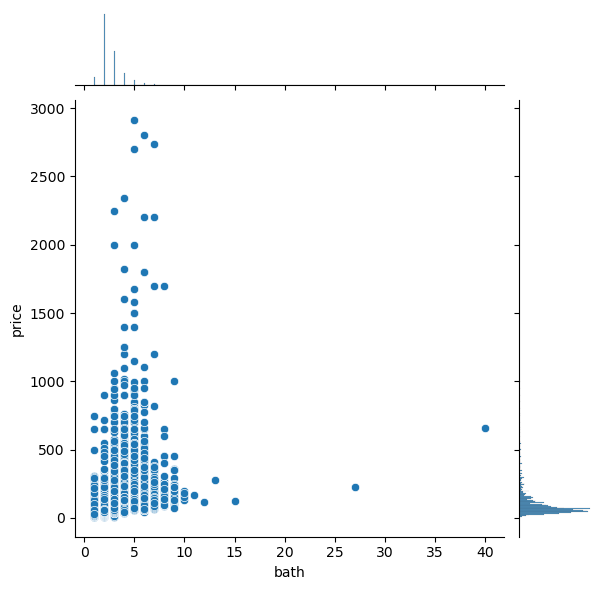

In [12]:
sns.jointplot(data,x='bath',y='price')

In [13]:
y=data['price']
x=data.drop(['price'],axis=1)

In [14]:
y.value_counts()

75.00     294
65.00     286
55.00     262
60.00     261
45.00     227
         ... 
27.54       1
84.95       1
63.98       1
402.00      1
488.00      1
Name: price, Length: 1924, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9716, 7) (2430, 7) (9716,) (2430,)


In [17]:
from sklearn.svm import SVR
model3=SVR()
model3.fit(x_train,y_train)

SVR()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out_t=model3.predict(x_train)
print('MSE',mean_squared_error(y_train,out_t))
print('RMSE',np.sqrt(mean_squared_error(y_train,out_t)))
print('MAE',mean_absolute_error(y_train,out_t))
print('MAPE',mean_absolute_percentage_error(y_train,out_t))

MSE 12056.448487035246
RMSE 109.80186012557003
MAE 41.34152183057654
MAPE 0.3193715490710614


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
out=model3.predict(x_test)
print('MSE',mean_squared_error(y_test,out))
print('RMSE',np.sqrt(mean_squared_error(y_test,out)))
print('MAE',mean_absolute_error(y_test,out))
print('MAPE',mean_absolute_percentage_error(y_test,out))

MSE 23198.339399897875
RMSE 152.31001083283357
MAE 45.81788434788422
MAPE 0.32680004674107294


## Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

If your goal is to predict the actual price of a house as accurately as possible, then Mean Squared Error (MSE) would be the more appropriate evaluation metric to use with your SVM regression model.

Here's why MSE is preferred for this scenario:

1. **Accuracy of Prediction**: MSE directly measures the average squared difference between predicted and actual house prices. Minimizing MSE results in predictions that are as close as possible to the true house prices on average. Since your goal is to predict house prices as accurately as possible, MSE provides a clear and direct measure of prediction accuracy.

2. **Interpretability**: MSE is easy to interpret and understand. It represents the average squared error between predicted and actual house prices, making it straightforward to assess the performance of the regression model in terms of prediction accuracy.

3. **Emphasis on Error Magnitude**: MSE penalizes large errors more heavily than small errors due to the squaring operation. This property is beneficial when predicting house prices, as you want to minimize the impact of large prediction errors, which can have significant financial implications.

On the other hand, R-squared (coefficient of determination) measures the proportion of the variance in the target variable (house prices) that is explained by the independent variables (features). While R-squared provides information about how well the model fits the data, it may not directly reflect prediction accuracy in terms of minimizing errors in house price predictions.

In summary, when your goal is to predict the actual price of a house as accurately as possible, MSE is the more appropriate evaluation metric to use with your SVM regression model. It directly quantifies prediction accuracy by measuring the average squared difference between predicted and actual house prices.

## Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?


When dealing with a dataset containing a significant number of outliers, it's essential to choose a regression metric that is robust to outliers. In this scenario, the Mean Absolute Error (MAE) would be the most appropriate regression metric to use with your SVM model.

Here's why MAE is suitable for handling outliers:

1. **Robustness**: MAE is less sensitive to outliers compared to other metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Since MAE calculates the average absolute difference between predicted and actual values, it gives equal weight to all errors, regardless of their magnitude. This property makes MAE more robust to outliers because large errors do not disproportionately influence the metric.

2. **Interpretability**: MAE is directly interpretable and represents the average absolute error between predicted and actual values. This makes it easier to understand and communicate the model's performance, especially in the presence of outliers.

3. **Resilience to Extreme Values**: Unlike MSE and RMSE, which square the errors, MAE treats all errors linearly. Consequently, MAE is less affected by extreme values and is better able to capture the central tendency of the data, even in the presence of outliers.

In summary, when dealing with a dataset containing a significant number of outliers, using MAE as the regression metric with your SVM model would be the most appropriate choice. MAE provides a robust measure of prediction accuracy that is less influenced by outliers and is easier to interpret.

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?


When deciding between Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) as metrics for evaluating the performance of an SVM regression model with a polynomial kernel, both metrics are measures of the model's prediction accuracy, particularly for continuous outcomes. Since you've mentioned that the values of MSE and RMSE are very close, either metric can be chosen in this case. However, there are some considerations to keep in mind:

1. **Interpretability**: MSE is directly interpretable and represents the average squared difference between the actual and predicted values. RMSE, on the other hand, is the square root of MSE and represents the average deviation of predicted values from actual values in the same units as the target variable. If you prefer a metric that is more interpretable and easier to relate to the original scale of the target variable, you may choose RMSE.

2. **Sensitivity to Outliers**: RMSE gives relatively more weight to large errors compared to MSE due to the square root operation. If your dataset contains outliers and you want the evaluation metric to be more sensitive to these outliers, RMSE may be a better choice.

3. **Mathematical Properties**: RMSE penalizes large errors more heavily than MSE due to the square root operation. If you want a metric that puts more emphasis on reducing large errors, RMSE may be preferred.

4. **Computational Efficiency**: MSE is computationally more efficient to calculate compared to RMSE since it does not involve taking square roots. If computational efficiency is a concern, MSE may be favored.

In summary, both MSE and RMSE are valid metrics for evaluating the performance of an SVM regression model with a polynomial kernel, especially if their values are very close. Your choice between the two should depend on factors such as interpretability, sensitivity to outliers, mathematical properties, and computational efficiency.

## Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

Out of the given options (linear, polynomial, and RBF kernels), the most appropriate evaluation metric to measure how well the SVM regression model explains the variance in the target variable is:

**R-squared (R²)**

Here's why:

* **R-squared:** This metric represents the proportion of variance in the dependent variable (target variable) that is explained by the independent variables (features) in the model. It ranges from 0 to 1, where 0 indicates no explanatory power and 1 indicates perfect fit.

* **Other options:**
    * **Mean Squared Error (MSE):** While MSE measures the average squared difference between predicted and actual values, it doesn't directly reflect the variance explained by the model.
    * **Kernel choice (linear, polynomial, RBF):** This refers to the type of function used by the SVM model to transform the data. It doesn't directly relate to the evaluation metric.

Therefore, R-squared provides a clear indication of how well the model captures the true variability in the target variable, making it the most suitable choice for your goal.
